In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import json

## Gathering

### A.Importing Enhanced Twitter Archive

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### B. Downloading the Tweet Image Predictions

In [3]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv' , mode = 'wb') as file:
    file.write(response.content)

### C. Getting Tweet Data from Twitter API

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

ModuleNotFoundError: No module named 'tweepy'

In [5]:
df_twitterlist = []

with open ('tweet-json.txt') as file:
    for line in file:
        df_twitterlist.append(json.loads(line))

In [6]:
print(df_twitterlist[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [7]:
#creating dataframe
tweets_data = pd.DataFrame(df_twitterlist , columns = ['id' , 'retweet_count' , 'favorite_count'])

In [8]:
tweets_data.rename(columns = {"id" : "tweet_id"} , inplace = True)

In [9]:
tweets_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [10]:
#saving dataframe into csv file

tweets_data.to_csv('tweets_data.csv' , index = False)

In [11]:
# test

t_data = pd.read_csv('tweets_data.csv')
t_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [12]:
#reading the Image Prediction CSV

image_predict = pd.read_csv('image-predictions.tsv' , sep='\t')

## Assessing Data

In [13]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2305,666837028449972224,NaN,NaN,2015-11-18 04:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My goodness. Very rare dog here. Large. Tail d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666837028...,3,10,None,None,None,None,None
1858,675501075957489664,NaN,NaN,2015-12-12 02:23:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I shall call him squishy and he shall be mine,...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/675501075...,13,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,811740824.0,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
2081,670822709593571328,NaN,NaN,2015-11-29 04:32:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can't do better than this lol. 10/10 for the o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670822709...,10,10,None,None,None,None,None
1403,699413908797464576,NaN,NaN,2016-02-16 02:04:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Miley. She's a Scandinavian Hollabackgirl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699413908...,11,10,Miley,None,None,None,None


In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
twitter_archive[twitter_archive.rating_numerator<10].count()[0]

440

In [18]:
twitter_archive[twitter_archive.rating_numerator<10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 440, dtype: int64

In [19]:
twitter_archive[twitter_archive.tweet_id==883482846933004288].rating_numerator

45    5
Name: rating_numerator, dtype: int64

In [20]:
twitter_archive.loc[(twitter_archive.tweet_id==883482846933004288) , 'text']

45    This is Bella. She hopes her smile made you sm...
Name: text, dtype: object

In [21]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
twitter_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [23]:
twitter_archive[twitter_archive.rating_denominator!=10].count()[0]

23

In [24]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [25]:
twitter_archive[twitter_archive.rating_denominator==170].tweet_id

1120    731156023742988288
Name: tweet_id, dtype: int64

## Assesing Image Prediction Tweets

In [26]:
image_predict.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
image_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


# Cleaning

In [29]:
#copying dataframe to keep original data
twitter_archive_clean = twitter_archive.copy()
tweets_data_clean = tweets_data.copy()
image_predict_Clean = image_predict.copy()

## 1. Tiding 

### A.cleaning (twitter_archive) datframe

### Define

In [30]:
# Dogs classification table structure shall be modified(duggo , …)

### Code

In [31]:


twitter_archive_clean['dog_classification']  = twitter_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
twitter_archive_clean['dog_classification'].sample(10)

68         NaN
631     pupper
1314       NaN
506        NaN
62         NaN
1077       NaN
645        NaN
2235       NaN
748     pupper
640        NaN
Name: dog_classification, dtype: object

In [32]:
twitter_archive_clean = twitter_archive_clean.drop(columns=['doggo' , 'floofer' , 'pupper' , 'puppo'])

### Testing

In [33]:
#testing
twitter_archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_classification
1438,696900204696625153,NaN,NaN,2016-02-09 03:35:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She's a Benebark Cumberpatch. S...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696900204...,12,10,Rosie,NaN
2228,668256321989451776,NaN,NaN,2015-11-22 02:34:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jareld. Jareld rules these waters. Lad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668256321...,13,10,Jareld,NaN
249,845306882940190720,NaN,NaN,2017-03-24 16:10:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pickles. She's a silly pupper. Thinks ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/845306882...,12,10,Pickles,pupper


In [34]:
#testing
twitter_archive_clean.dog_classification.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_classification, dtype: int64

In [35]:
tweets_data_clean.replace('id' , 'tweets_id')
tweets_data_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### B. Fixing issue :All data are related but separated into 3 data frames

### Define

In [36]:
# merging all 3 dataframes into one (twitter_archive_clean)

### Code

In [37]:

twitter_archive_clean = pd.merge(twitter_archive_clean , tweets_data_clean , on = 'tweet_id' , how = 'left')
twitter_archive_clean = pd.merge(twitter_archive_clean , image_predict_Clean , on = 'tweet_id' , how = 'left')



### Testing

In [38]:
# Testing
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_classification          399 n

## Quality

### Q1. there is 181 retweets which shall not be existed

### code

In [39]:
#keep only null retweeted tweets
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  dog_classification          364 n

In [41]:
#drop unusefull columns
twitter_archive_clean = twitter_archive_clean.drop( columns = ['retweeted_status_id' , 'retweeted_status_user_id' , 'retweeted_status_id' , 'retweeted_status_timestamp'])

### Testing

In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  dog_classification     364 non-null    object 
 11  retweet_count          2175 non-null   float64
 12  favorite_count         2175 non-null   float64
 13  jpg_url                1994 non-null   object 
 14  img_num                1994 non-null   float64
 15  p1  

### Q2. Name column has some typo errors (like dog’s name (a) or (an)

### Code

In [43]:
twitter_archive_clean.name.replace(regex = ['^[a-z]+' , 'None'] , value = np.nan , inplace = True)

In [44]:
#twitter_archive_clean.name
sum(twitter_archive_clean.name.isnull())

784

In [45]:
def get_dog_name(text):
    tweet_text = text.split()
    for word in tweet_text:
        if word.lower() == 'named':
            word_index = tweet_text.index(word)+1
            return tweet_text[word_index]
    return np.nan
        

In [46]:
twitter_archive_clean.name = np.where(twitter_archive_clean.name.isnull() , twitter_archive_clean.text.apply(get_dog_name) , twitter_archive_clean.name)

### Testing

In [47]:
sum(twitter_archive_clean.name.isnull())

761

### Q3. Timestamp datatype shall be (datetime) instead of string

### Define

In [48]:
#change (timestamp)column from string to datetime

### Code

In [49]:
twitter_archive_clean.timestamp = pd.to_datetime (twitter_archive_clean.timestamp)

### Testing

In [50]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2175 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2175 non-null   datetime64[ns, UTC]
 4   source                 2175 non-null   object             
 5   text                   2175 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2175 non-null   int64              
 8   rating_denominator     2175 non-null   int64              
 9   name                   1414 non-null   object             
 10  dog_classification     364 non-null    object             
 11  retweet_count          2175 non-null   float64          

### Q4. tweets_id column in twitter_archive_clean table datatype shall be (int) instead of string

### Define

In [51]:
#convert tweet_id column is twitter_archive_clean table to string

### Code

In [52]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

### Testing

In [53]:
np.dtype(twitter_archive_clean.tweet_id)

dtype('O')

### Q5.- Some Predictions P-names start with lower case letters and others are uppercase

### Define

In [54]:
# change all P-names to Uppercase letters

### Code

In [55]:
twitter_archive_clean.p1 = twitter_archive_clean.p1.str.upper()
twitter_archive_clean.p2 = twitter_archive_clean.p1.str.upper()
twitter_archive_clean.p3 = twitter_archive_clean.p1.str.upper()

### Testing

In [56]:
twitter_archive_clean.p1.str.islower().sum()
twitter_archive_clean.p2.str.islower().sum()
twitter_archive_clean.p3.str.islower().sum()

0

### Q6.- change (_) with white spaces in P-columns

### Define

In [57]:
#replace (_) with white spaces in P-columns

### Code

In [58]:
twitter_archive_clean.p1 = twitter_archive_clean.p1.str.replace ('_' , ' ')
twitter_archive_clean.p2 = twitter_archive_clean.p1.str.replace ('_' , ' ')
twitter_archive_clean.p3 = twitter_archive_clean.p1.str.replace ('_' , ' ')

### Testing

In [59]:
twitter_archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2253,667793409583771648,NaN,NaN,2015-11-20 19:55:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Dogs only please. Small cows and other non can...,https://twitter.com/dog_rates/status/667793409...,8,10,NaN,...,1.0,DALMATIAN,0.535073,True,DALMATIAN,0.451219,True,DALMATIAN,0.008164,True
1631,684481074559381504,NaN,NaN,2016-01-05 21:06:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Pippa. She's an Elfin High Feta. Compact ...,https://twitter.com/dog_rates/status/684481074...,10,10,Pippa,...,1.0,CHIHUAHUA,0.937810,True,CHIHUAHUA,0.020307,True,CHIHUAHUA,0.017357,False
1123,730427201120833536,NaN,NaN,2016-05-11 15:59:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Crystal. She's flawless. Really wants ...,https://twitter.com/dog_rates/status/730427201...,11,10,Crystal,...,1.0,ESKIMO DOG,0.682082,True,ESKIMO DOG,0.289288,True,ESKIMO DOG,0.008771,True
1894,674743008475090944,NaN,NaN,2015-12-10 00:10:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just saw a spider. 10/10 d...,https://twitter.com/dog_rates/status/674743008...,10,10,Sophie,...,1.0,BERNESE MOUNTAIN DOG,0.583054,True,BERNESE MOUNTAIN DOG,0.065990,True,BERNESE MOUNTAIN DOG,0.065236,True
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,...,1.0,CHOW,0.987997,True,CHOW,0.007099,True,CHOW,0.002140,True


### Q7- 40 rows has rating_numerators < 10

### Define

In [60]:
#get the rating numerator from tweet text 
# to correct the <10 wrong entries

### Code

In [61]:
twitter_archive_clean[twitter_archive_clean.rating_numerator<10].count()[0]

431

In [62]:
# def get_rating_numerator(text):
#     tweet_text = text.split()
#     for word in tweet_text:
#         if (word.lower() == '/') :
#             word_index = tweet_text.index(word)-1
#             print(word_index)
#             return tweet_text[word_index]
#     return np.nan

In [63]:
import re
def get_rating_numerator(text):
    tweet_text = text.split()
    for word in tweet_text:
        if (re.match(r'\/\d+' , word.lower())) :
            word_index = tweet_text.index(word)-1
            print(word_index)
            return tweet_text[word_index]
    return np.nan

In [64]:
twitter_archive_clean.rating_numerator = np.where(twitter_archive_clean.rating_numerator<10 , twitter_archive_clean.text.apply(get_rating_numerator) , twitter_archive_clean.rating_numerator)

### Testing

In [65]:
twitter_archive_clean[twitter_archive_clean.rating_numerator<10].count()[0]

0

### Q8- Missing photos for some tweets ids (2035 against 2356 in tweet_archive dataframe)

### Define

In [66]:
#Delete rows that doesn't have jpg_url data

In [67]:
sum(twitter_archive_clean.jpg_url.isnull())

181

### Code

In [68]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.jpg_url.notnull()]

### Testing

In [69]:
sum(twitter_archive_clean.jpg_url.isnull())

0

# 5-Storing cleaned Data into csv file

In [73]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')

# 6-Data Analysis & Visualization

### 1. Percentages of Different Dog Classifications

In [74]:
dog_classification = twitter_archive_clean.dog_classification.value_counts()
dog_classification

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_classification, dtype: int64

Text(0.5, 1.0, 'Percentage of Different Dog Classifications')

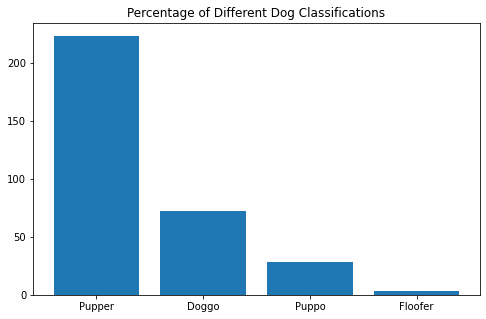

In [75]:

plt.subplots(figsize=(8, 5))
plt.bar(['Pupper' , 'Doggo' , 'Puppo' , 'Floofer'] , dog_classification)
plt.title('Percentage of Different Dog Classifications')


#### Insights :
1. Pupper has the heighst Percentage
2. Floofer has the lowest Percentage

### 2. Top 6 Dog Types occurance in tweets

GOLDEN RETRIEVER      139
LABRADOR RETRIEVER     95
PEMBROKE               88
CHIHUAHUA              79
PUG                    54
                     ... 
CLUMBER                 1
SILKY TERRIER           1
GROENENDAEL             1
ENTLEBUCHER             1
JAPANESE SPANIEL        1
Name: p1, Length: 111, dtype: int64

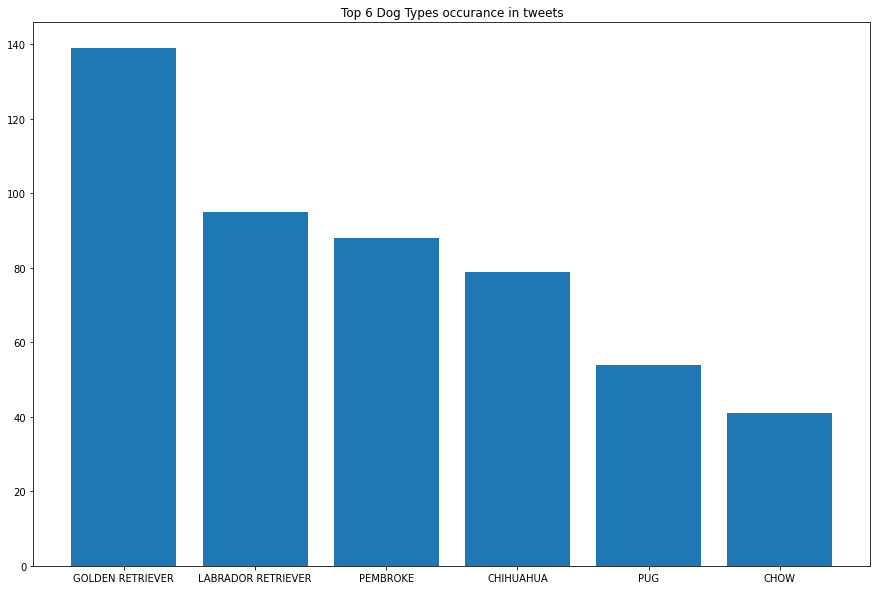

In [76]:
P_dog2 = twitter_archive_clean[twitter_archive_clean.p1_dog] 
plt.subplots(figsize=(15, 10))
#plt.bar(P_dog2.p1.unique()[:6] , P_dog2.p1.value_counts()[:6])
plt.bar(P_dog2.p1.value_counts().index.tolist()[:6] , P_dog2.p1.value_counts()[:6])  

plt.title('Top 6 Dog Types occurance in tweets')
P_dog2.p1.value_counts()
#P_dog2.p1.unique()

#### insights : Top 6 Dog Occurances
1. GOLDEN RETRIEVER has the heighst occurance
2. Labrador Retriever  
3. PEMBROKE
4. CHIHUAHUA 
5. PUG 
6. CHOW

### 3. Relation between retweet_count & Dog Classification

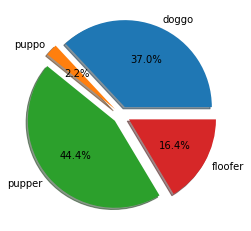

In [77]:


df_test2 =twitter_archive_clean[twitter_archive_clean.dog_classification.notnull()]


plt.pie (df_test2.groupby('dog_classification').retweet_count.sum()
    ,labels = df_test2.dog_classification.unique()
        , explode = ( 0.1 , 0.1 , 0.1 , 0.1) , autopct='%1.1f%%' , shadow = True)

plt.show()


#### insights : Percentages of Dog Classifications against retweets_count
1. pupper : 44.4%
2. doggo :  37%
3. Floofer : 16.4%
4. puppo : 2.2%